In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Import Modules

In [63]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [64]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    
print('Dataset is Loaded')

Dataset is Loaded


In [65]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [66]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [67]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [68]:
df['label'].value_counts()

fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: label, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

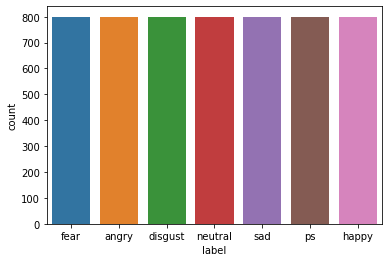

In [69]:
sns.countplot(df['label'])

In [70]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

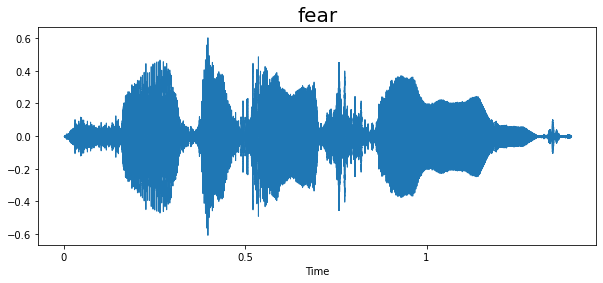

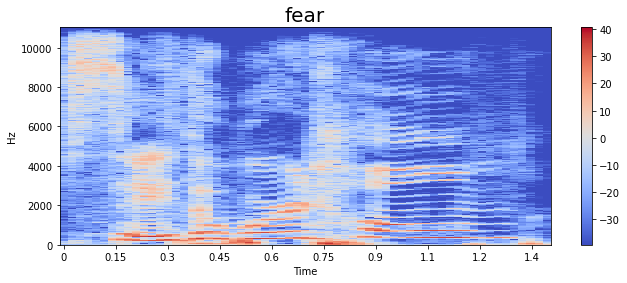

In [71]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

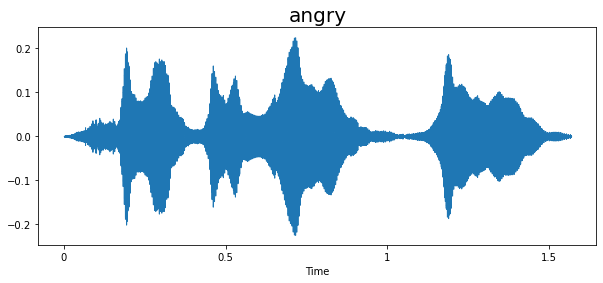

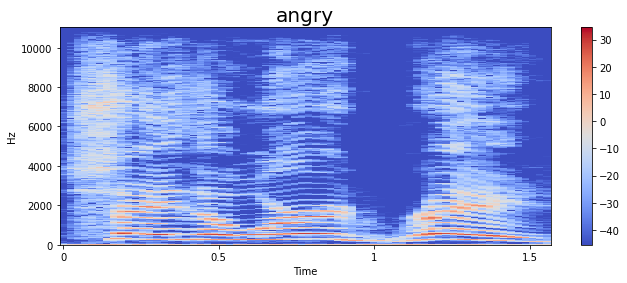

In [72]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

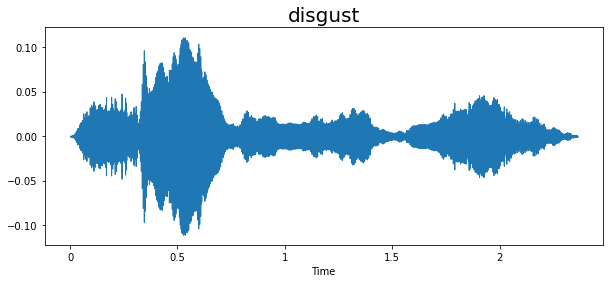

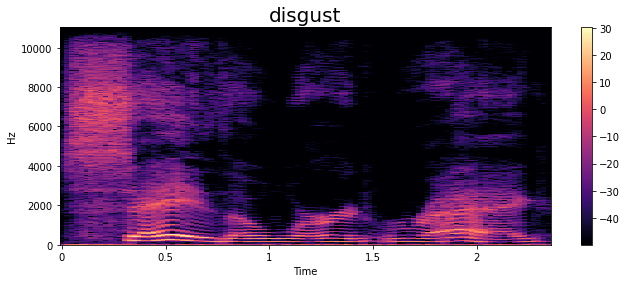

In [73]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[3]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

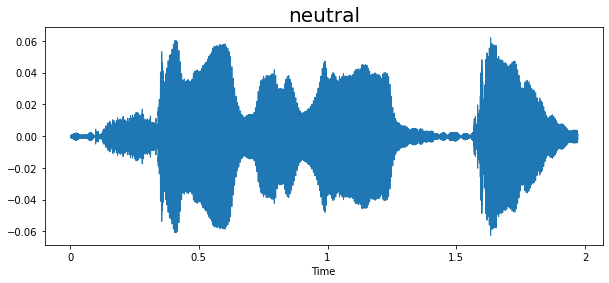

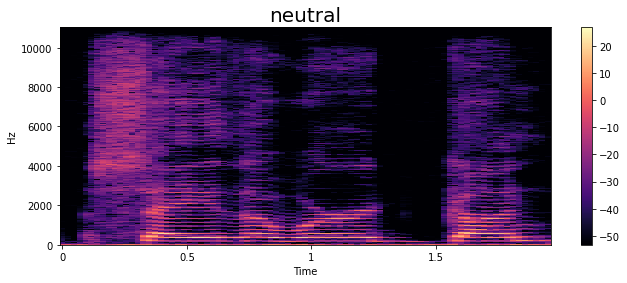

In [74]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[3]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

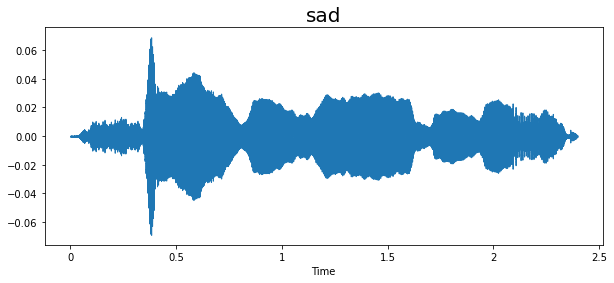

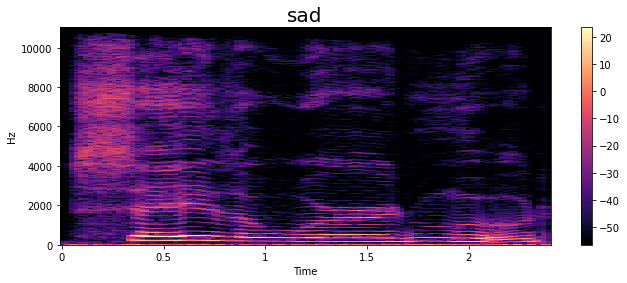

In [75]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[3]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

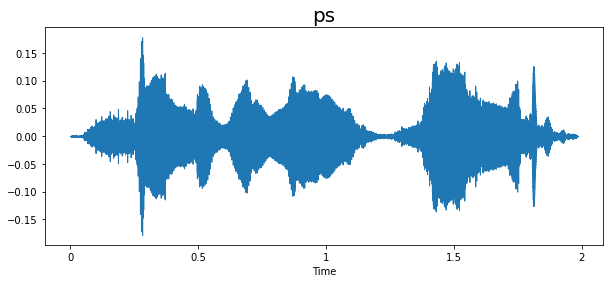

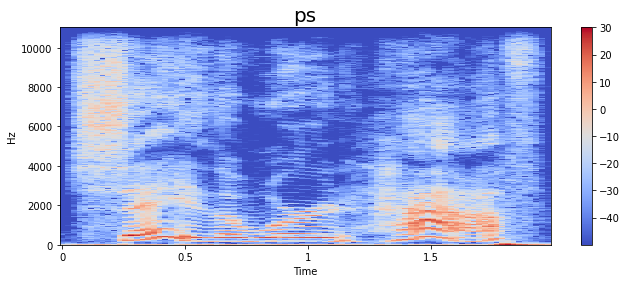

In [76]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[3]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

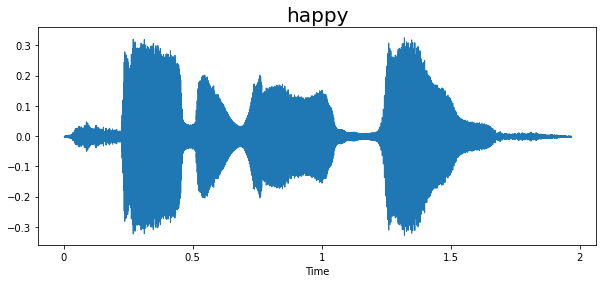

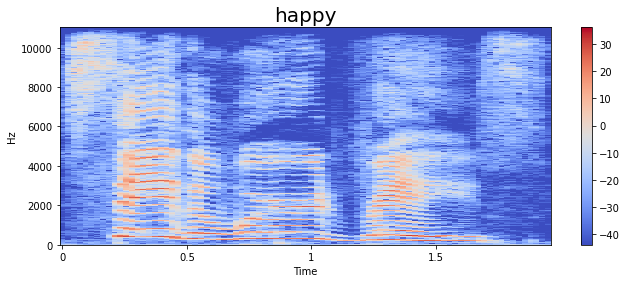

In [77]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[3]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [78]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc 

In [79]:
extract_mfcc(df['speech'][0])

array([-286.02707  ,   86.23414  ,   -2.635008 ,   22.56944  ,
        -15.209238 ,   11.531056 ,   11.94983  ,   -2.5640693,
          0.6349985,   11.539477 ,  -17.85487  ,   -7.673544 ,
          6.1565228,   -3.800448 ,   -9.552902 ,    3.9220483,
        -13.588675 ,   14.449348 ,   19.31697  ,   23.08124  ,
         32.217903 ,   16.650955 ,   -4.1388583,    1.20185  ,
        -11.535383 ,    6.917931 ,   -2.840763 ,   -7.467058 ,
        -11.169154 ,   -2.189063 ,   -5.489987 ,    4.463149 ,
        -11.367347 ,   -8.86639  ,   -3.8222969,    5.000417 ,
         -1.7143743,    2.664231 ,   11.361882 ,   11.313575 ],
      dtype=float32)

In [80]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [81]:
X_mfcc

0       [-286.02707, 86.23414, -2.635008, 22.56944, -1...
1       [-348.7427, 35.7786, -4.4302225, 15.252253, 5....
2       [-340.4982, 54.36257, -14.845929, 21.453777, 8...
3       [-307.126, 21.987495, -5.146963, 7.2266827, -8...
4       [-345.27826, 47.10734, -24.942877, 20.17883, 1...
                              ...                        
5595    [-374.88943, 61.588352, -0.70487046, 9.159213,...
5596    [-314.5199, 40.65166, -6.461393, -3.05994, -51...
5597    [-358.06696, 78.64016, -15.999416, 2.9611566, ...
5598    [-353.46466, 102.15106, -14.645692, -11.564198...
5599    [-389.82825, 54.579174, 0.80754703, -0.8762022...
Name: speech, Length: 5600, dtype: object

In [82]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [83]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [84]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [85]:
y = y.toarray()

In [86]:
y.shape

(5600, 7)

## Create the LSTM Model

In [87]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 7)                

In [88]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
70/70 [==============================] - 3s 15ms/step - loss: 0.8256 - accuracy: 0.6933 - val_loss: 0.8811 - val_accuracy: 0.6330
Epoch 2/50
70/70 [==============================] - 1s 8ms/step - loss: 0.2422 - accuracy: 0.9145 - val_loss: 0.1280 - val_accuracy: 0.9607
Epoch 3/50
70/70 [==============================] - 1s 8ms/step - loss: 0.1506 - accuracy: 0.9525 - val_loss: 0.1192 - val_accuracy: 0.9616
Epoch 4/50
70/70 [==============================] - 1s 10ms/step - loss: 0.1220 - accuracy: 0.9616 - val_loss: 0.4589 - val_accuracy: 0.8643
Epoch 5/50
70/70 [==============================] - 1s 8ms/step - loss: 0.0954 - accuracy: 0.9708 - val_loss: 0.0950 - val_accuracy: 0.9705
Epoch 6/50
70/70 [==============================] - 1s 8ms/step - loss: 0.0877 - accuracy: 0.9725 - val_loss: 0.0649 - val_accuracy: 0.9795
Epoch 7/50
70/70 [==============================] - 1s 8ms/step - loss: 0.0790 - accuracy: 0.9752 - val_loss: 0.0670 - val_accuracy: 0.9804
Epoch 8/50
70/70 [

## PLot the Results

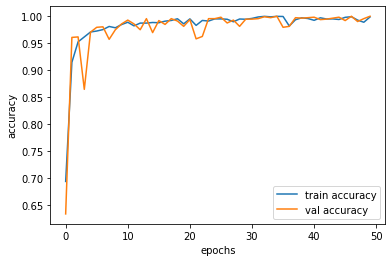

In [89]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

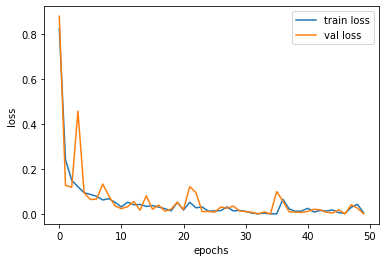

In [90]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()